In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
df = pd.read_csv(f'/content/crop_yield_data.csv')

In [ ]:
df.head()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
0,1626,9,636,11,1006,404
1,1959,9,73,11,112,115
2,1360,1,352,5,702,231
3,1794,2,948,7,299,537
4,1630,5,884,5,2733,554
...,...,...,...,...,...,...
2982,1995,6,615,6,1769,413
2983,1443,7,270,11,1650,224
2984,698,6,799,10,535,442
2985,1949,6,880,4,939,528


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   rainfall_mm         3000 non-null   int64
 1   soil_quality_index  3000 non-null   int64
 2   farm_size_hectares  3000 non-null   int64
 3   sunlight_hours      3000 non-null   int64
 4   fertilizer_kg       3000 non-null   int64
 5   crop_yield          3000 non-null   int64
dtypes: int64(6)
memory usage: 140.8 KB


In [ ]:
df.describe()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1263.095000,5.506667,498.801000,7.995333,1549.450333,328.099000
std,432.371756,2.855172,287.122742,2.621501,814.326919,145.036503
min,500.000000,1.000000,10.000000,4.000000,100.000000,46.000000
25%,896.000000,3.000000,242.000000,6.000000,869.750000,199.000000
50%,1277.000000,6.000000,505.000000,8.000000,1542.000000,332.000000
75%,1636.000000,8.000000,741.000000,10.000000,2225.000000,455.000000
max,2000.000000,10.000000,1000.000000,12.000000,3000.000000,628.000000


In [ ]:
df.isnull().sum()

,0
rainfall_mm,0
soil_quality_index,0
farm_size_hectares,0
sunlight_hours,0
fertilizer_kg,0
crop_yield,0


In [ ]:
df.duplicated().sum()

np.int64(0)

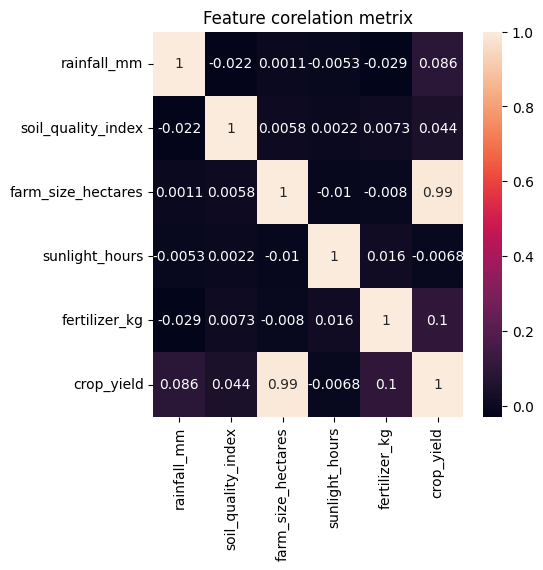

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)
plt.title('Feature corelation metrix')
plt.show()

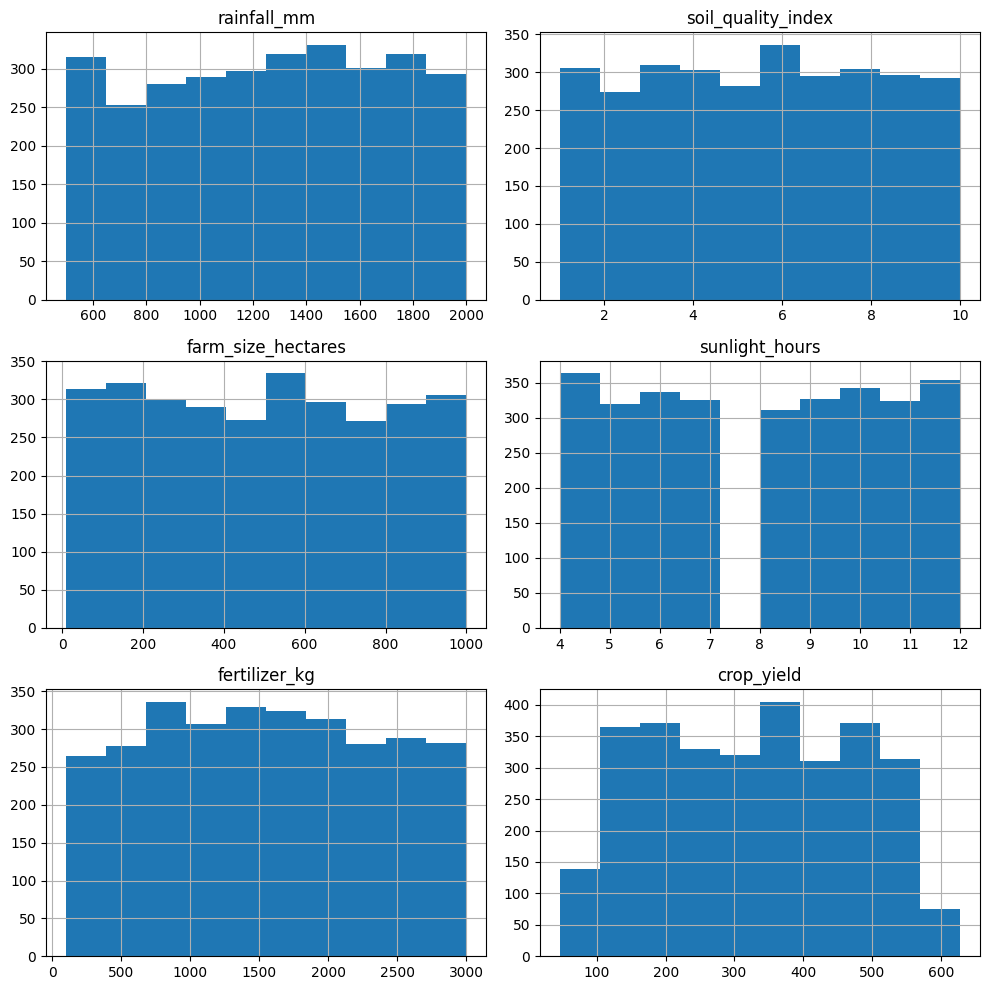

In [ ]:
df.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

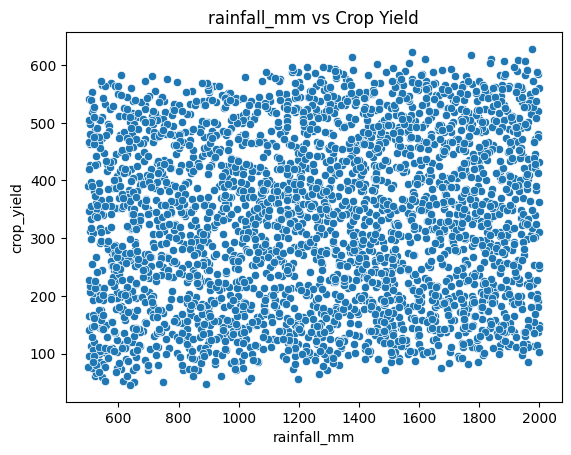

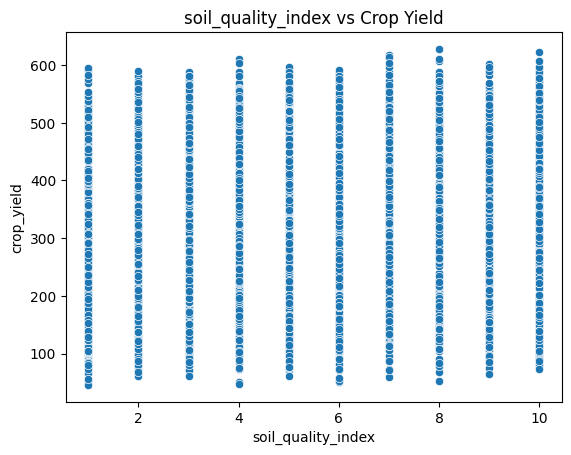

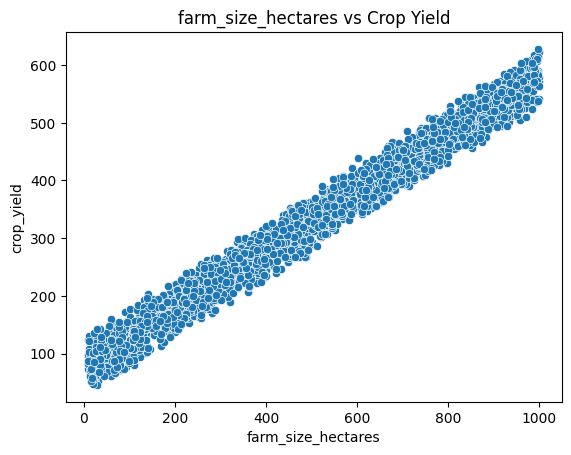

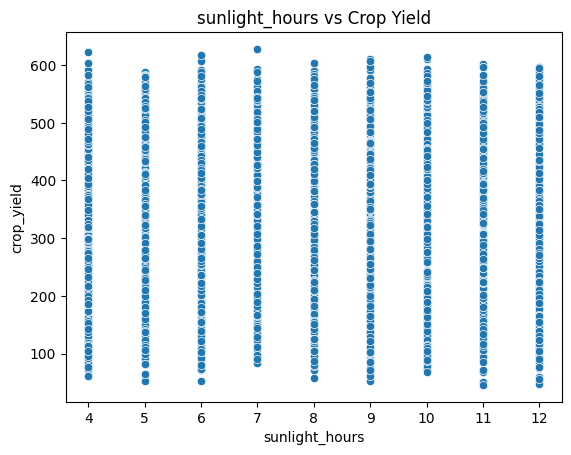

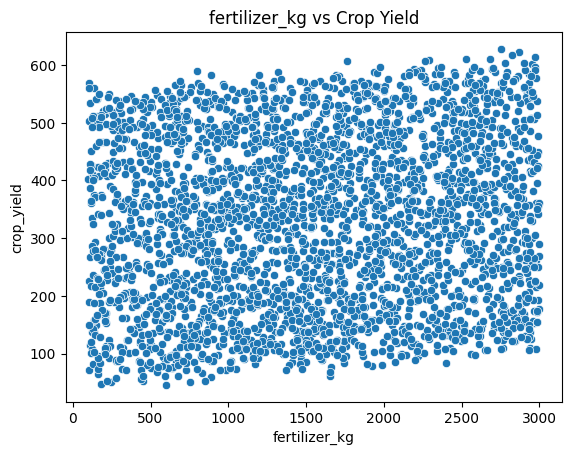

In [ ]:
for i in df.iloc[:,:5]:
  plt.figure()
  sns.scatterplot(x=df[i] , y=df['crop_yield'])
  plt.title(f'{i} vs Crop Yield')
  plt.show()

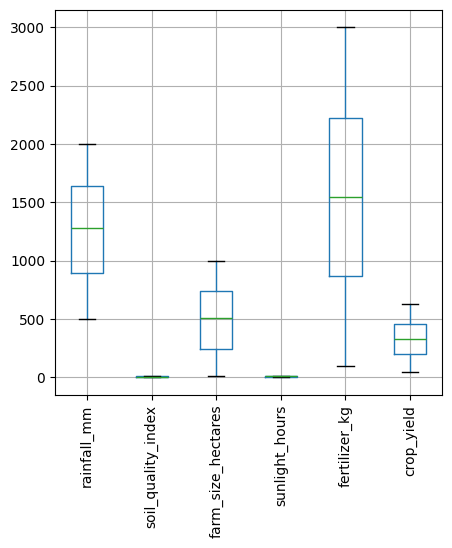

In [ ]:
df.boxplot(figsize=(5,5))
plt.xticks(rotation=90)
plt.show()

In [ ]:
min_scaler = MinMaxScaler()
df_scale = min_scaler.fit_transform(df.iloc[:,:5])
df_new = pd.DataFrame(df_scale , columns=df.columns[:5])

In [ ]:
df_new

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg
0,0.750667,0.888889,0.632323,0.875,0.312414
1,0.972667,0.888889,0.063636,0.875,0.004138
2,0.573333,0.000000,0.345455,0.125,0.207586
3,0.862667,0.111111,0.947475,0.375,0.068621
4,0.753333,0.444444,0.882828,0.125,0.907931
...,...,...,...,...,...
2995,0.655333,0.888889,0.068687,1.000,0.910000
2996,0.202667,0.888889,0.475758,0.000,0.620000
2997,0.246667,0.000000,0.104040,0.375,0.752414
2998,0.568000,0.555556,0.764646,0.875,0.965862


In [ ]:
df_new.describe()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.508730,0.500741,0.493738,0.499417,0.499810
std,0.288248,0.317241,0.290023,0.327688,0.280802
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.264000,0.222222,0.234343,0.250000,0.265431
50%,0.518000,0.555556,0.500000,0.500000,0.497241
75%,0.757333,0.777778,0.738384,0.750000,0.732759
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df_new , df['crop_yield'] , test_size=0.2 , random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
print('mean squared error --> ', mean_squared_error(y_test , y_pred))
print('r2 score --> ', r2_score(y_test,y_pred))

mean squared error -->  0.08176058241410153
r2 score -->  0.9999961820468685


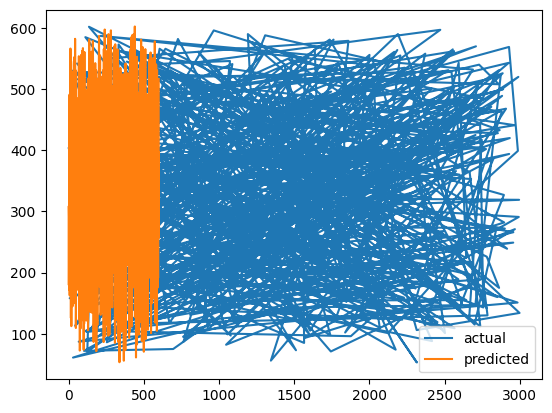

In [ ]:
plt.plot(y_test , label='actual')
plt.plot(y_pred , label='predicted')
plt.legend()
plt.show()

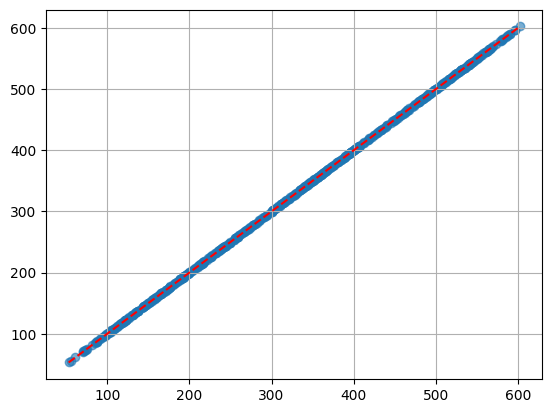

In [ ]:
plt.scatter(x=y_test , y=y_pred , alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid()
plt.show()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [ ]:
x_train.shape

(2400, 5)

In [ ]:
tr1 = ColumnTransformer([
    ('scaler',MinMaxScaler(),[0,1,2,3,4])
],remainder='passthrough')


pipe = Pipeline([
    ('scaler',tr1),
    ('model',LinearRegression())
])
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  [0, 1, 2, 3, 4])])),
                ('model', LinearRegression())])

In [ ]:
joblib.dump(pipe,'crop_yield_data.pkl')

['crop_yield_data.pkl']

In [ ]:
# for use

use = joblib.load('crop_yield_data.pkl')

In [ ]:
new_input =np.array([[1794,2,948,7,299]])
# output= use.predict(new_input)
# new_input = pd.DataFrame([[991, 3, 214, 8, 459]], columns=['rainfall_mm', 'soil_quality_index', 'farm_size_hectares', 'sunlight_hours', 'fertilizer_kg'])
output = use.predict(new_input)
print(output[0]/1000)

567.3329344784115


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')